In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
import re
import os

In [2]:
COLUMNS = ['period', 'wifi', 'Stack', 'Mbps']

In [3]:
runs = os.listdir('./formated_data')
experiments = {key: list(group) for key, group in itertools.groupby(runs, key=lambda exp_run: exp_run[:-6])}

In [4]:
print(experiments.keys())

dict_keys(['A1I1M1', 'A1I1M2', 'A1I1M3', 'A1I2M1', 'A1I2M2', 'A1I2M3', 'A2I1M1', 'A2I1M2', 'A2I1M3', 'A2I2M1', 'A2I2M2', 'A2I2M3', 'A3I1M1', 'A3I1M2', 'A3I1M3', 'A3I2M1', 'A3I2M2', 'A3I2M3'])


In [5]:
experiments_df = {key: pd.concat([pd.read_csv(f'./formated_data/{file_names}', usecols=COLUMNS) for file_names in experiments[key]]) for key in experiments}

In [6]:
#[0, 10[, [10, 20[, [20, 30[, [30, 40[, [40, 50[, ..., [160, 170[
def plot_stats(experiments_df, metric, figsize=(18, 24)):
    fig, axis = plt.subplots(6, 3, figsize=figsize)
    for i, experiment in enumerate(experiments_df):
        aXiXmX = experiments_df[experiment]
        aXiXmX = aXiXmX[aXiXmX['period'] < 170]
        period_groups = aXiXmX.groupby('period')
        periods = period_groups.groups.keys()
        wifi_values = np.stack([period_groups.get_group(period)[metric].values for period in periods], axis=1)
        #wifi_values = np.concatenate([wifi_values[:,i::10] for i in range(10)], axis=0)
        pd.DataFrame(wifi_values[:,9::10], columns=list(range(9, 171, 10))).plot.box(ax=axis[i // 3][i % 3])
        axis[i // 3][i % 3].set_title(experiment)

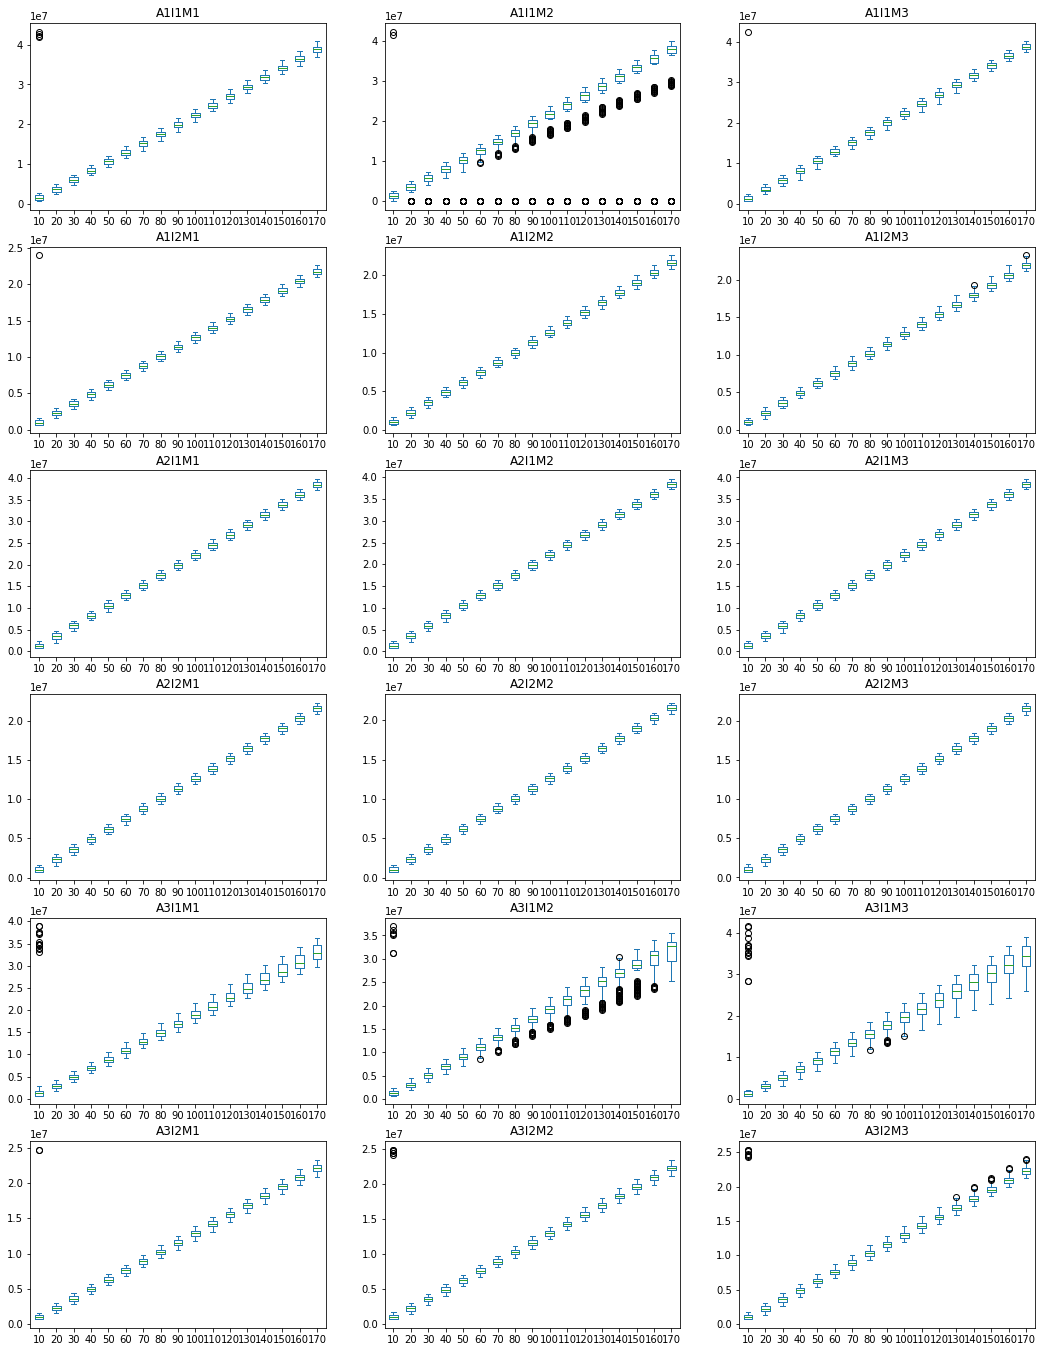

In [7]:
plot_stats(experiments_df, 'wifi')
# 3 x 6

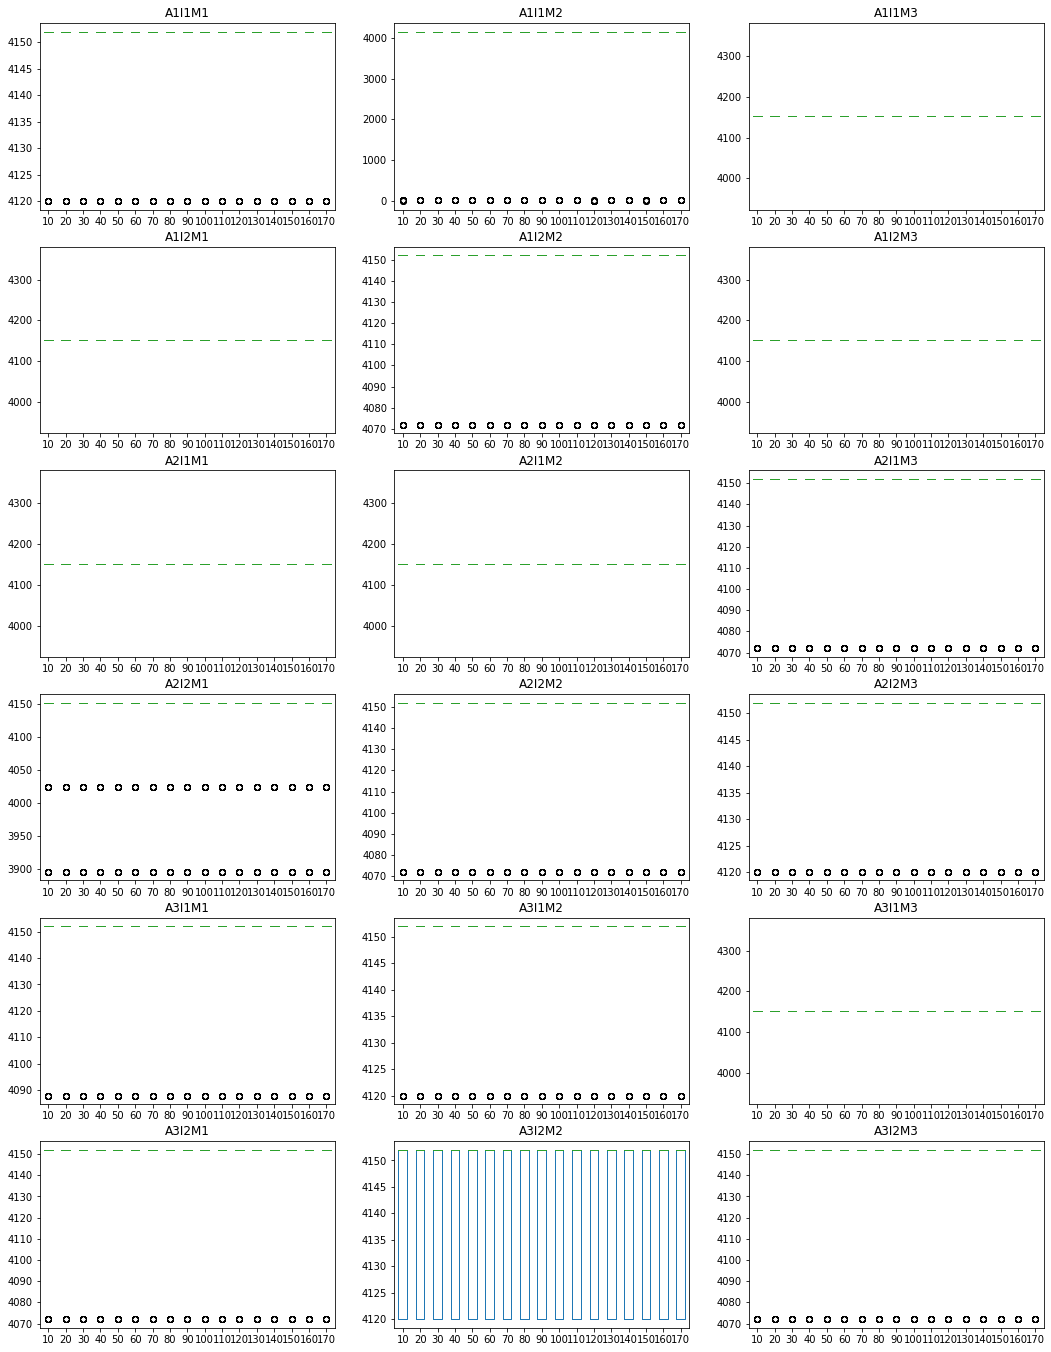

In [8]:
plot_stats(experiments_df, 'Stack')

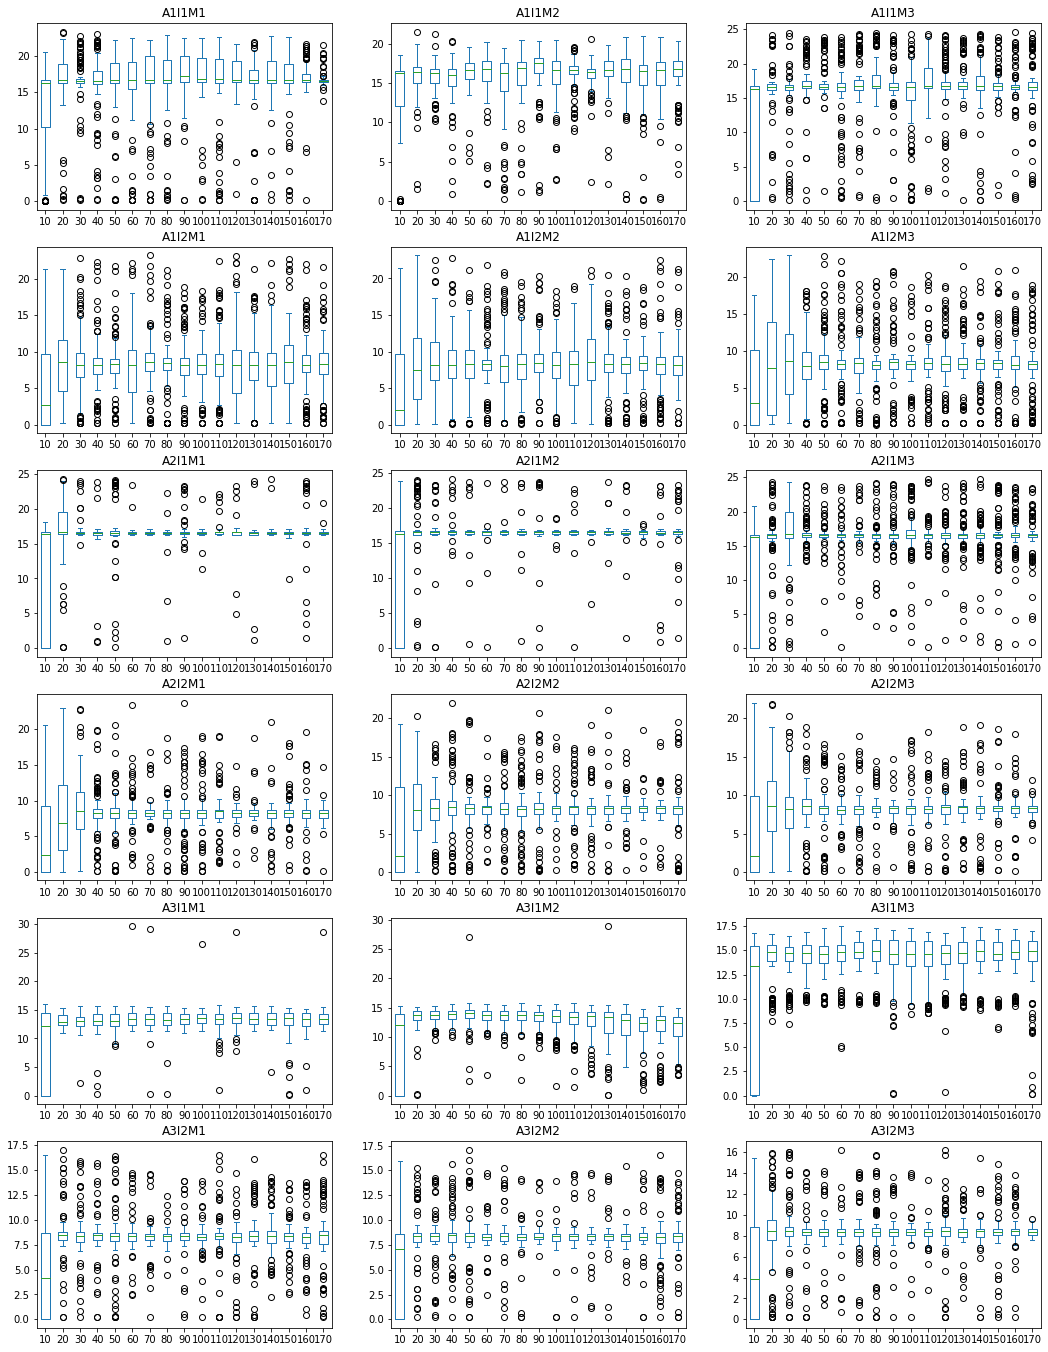

In [9]:
plot_stats(experiments_df, 'Mbps')